# Forecasting Unemployment Rate  in Canada


### Import Libraries and Read File

In [1]:
import pandas as pd
import math
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
data =pd.read_csv('EI Beneficiaries Dataset.csv')
data.head()

,Province,Year,Month,Month ID,Date Type1,Date,Beneficiary detail,Sex,Age group,UOM,VECTOR,COORDINATE,Latitude,Longitude,Employment,Labour Force,Unemployment,EI Beneficiaries,Unemployment_Rate
0,Alberta,1997,January,1,"January 1 ,1997",1997-1-1,Regular benefits,Males,15 years and over,Persons,v64549468,10.2.2.1,53.9333,-115,764500.0,824200.0,59700.0,24830.0,0.0724
1,Alberta,1997,February,2,"February 1 ,1997",1997-2-1,Regular benefits,Males,15 years and over,Persons,v64549468,10.2.2.1,53.9333,-115,768400.0,826600.0,58300.0,23410.0,0.0705
2,Alberta,1997,March,3,"March 1 ,1997",1997-3-1,Regular benefits,Males,15 years and over,Persons,v64549468,10.2.2.1,53.9333,-115,776600.0,830600.0,54000.0,23200.0,0.0650
3,Alberta,1997,April,4,"April 1 ,1997",1997-4-1,Regular benefits,Males,15 years and over,Persons,v64549468,10.2.2.1,53.9333,-115,769500.0,825100.0,55700.0,20250.0,0.0675
4,Alberta,1997,May,5,"May 1 ,1997",1997-5-1,Regular benefits,Males,15 years and over,Persons,v64549468,10.2.2.1,53.9333,-115,802300.0,851300.0,48900.0,20990.0,0.0574


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8400 entries, 0 to 8399
Data columns (total 19 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Province            8400 non-null   object 
 1   Year                8400 non-null   int64  
 2   Month               8400 non-null   object 
 3   Month ID            8400 non-null   int64  
 4   Date Type1          8400 non-null   object 
 5   Date                8400 non-null   object 
 6   Beneficiary detail  8400 non-null   object 
 7   Sex                 8400 non-null   object 
 8   Age group           8400 non-null   object 
 9   UOM                 8400 non-null   object 
 10  VECTOR              8400 non-null   object 
 11  COORDINATE          8400 non-null   object 
 12  Latitude            7800 non-null   float64
 13  Longitude           7800 non-null   object 
 14  Employment          8208 non-null   float64
 15  Labour Force        8208 non-null   float64
 16  Unempl

In [4]:
data.columns

Index(['Province', 'Year', 'Month', 'Month ID ', 'Date Type1 ', 'Date',
       'Beneficiary detail', 'Sex', 'Age group', 'UOM', 'VECTOR', 'COORDINATE',
       'Latitude', 'Longitude', 'Employment', 'Labour Force', 'Unemployment',
       'EI Beneficiaries', 'Unemployment_Rate'],
      dtype='object')

In [5]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Year,8400.0,2009.000000,7.211532,1997.0,2003.0000,2009.000000,2.015000e+03,2.021000e+03
Month ID,8400.0,6.500000,3.452258,1.0,3.7500,6.500000,9.250000e+00,1.200000e+01
Latitude,7800.0,54.736026,7.279562,45.0,50.0000,53.726669,5.641521e+01,7.045326e+01
Employment,8208.0,610848.586745,924882.548786,0.0,11700.0000,206200.000000,9.540250e+05,4.007600e+06
Labour Force,8208.0,658452.521930,996350.689116,0.0,12600.0000,222700.000000,1.015950e+06,4.329700e+06
Unemployment,8208.0,47603.594055,74816.262117,0.0,1300.0000,16300.000000,5.260000e+04,5.210000e+05
EI Beneficiaries,8208.0,21812.732700,32174.325711,10.0,680.0000,11075.000000,2.319250e+04,3.409700e+05
Unemployment_Rate,8400.0,0.075142,0.044576,0.0,0.0497,0.070400,9.690000e-02,2.554000e-01




### Missing Values 

In [6]:
data.isnull().sum()

Province                0
Year                    0
Month                   0
Month ID                0
Date Type1              0
Date                    0
Beneficiary detail      0
Sex                     0
Age group               0
UOM                     0
VECTOR                  0
COORDINATE              0
Latitude              600
Longitude             600
Employment            192
Labour Force          192
Unemployment          192
EI Beneficiaries      192
Unemployment_Rate       0
dtype: int64

#### Visualizing missing data

Text(0.5, 1.0, 'Missing Data in EI beneficiary dataset')

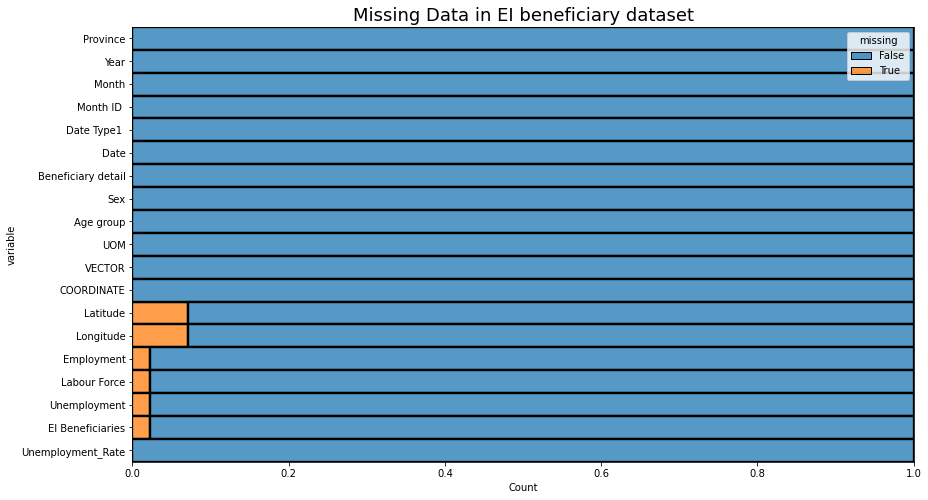

In [7]:
plt.figure(figsize=(14,8))
sns.histplot(
    data=data.isna().melt(value_name="missing"),
    y="variable",
    hue="missing",
    multiple="fill"
)
plt.savefig("visualizing_missing_data_with_barplot_Seaborn_distplot.png", dpi=100)
plt.title('Missing Data in EI beneficiary dataset', fontsize=18)


In [8]:
from datetime import datetime
import datetime
data['Date']= pd.to_datetime(data['Date'])
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8400 entries, 0 to 8399
Data columns (total 19 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Province            8400 non-null   object        
 1   Year                8400 non-null   int64         
 2   Month               8400 non-null   object        
 3   Month ID            8400 non-null   int64         
 4   Date Type1          8400 non-null   object        
 5   Date                8400 non-null   datetime64[ns]
 6   Beneficiary detail  8400 non-null   object        
 7   Sex                 8400 non-null   object        
 8   Age group           8400 non-null   object        
 9   UOM                 8400 non-null   object        
 10  VECTOR              8400 non-null   object        
 11  COORDINATE          8400 non-null   object        
 12  Latitude            7800 non-null   float64       
 13  Longitude           7800 non-null   object      

### Exploratory Data Analysis (Visualisation)

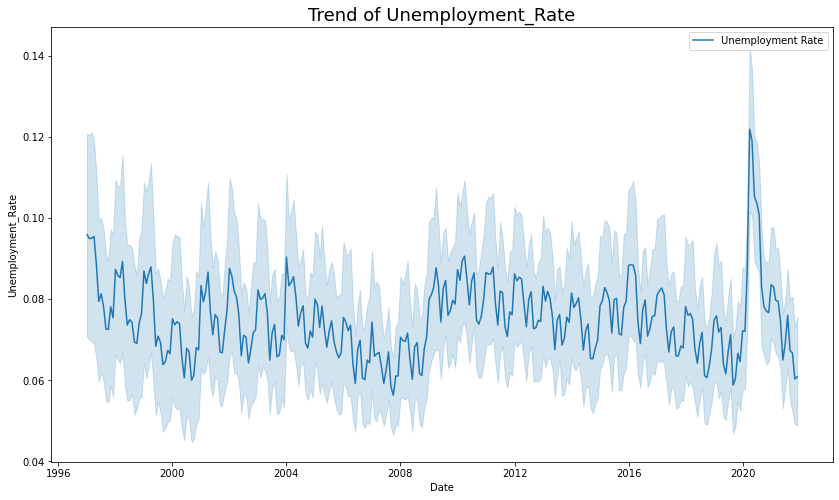

In [9]:
plt.figure(figsize=(14,8))
sns.lineplot(data=data, x='Date',y='Unemployment_Rate')
plt.title('Trend of Unemployment_Rate', fontsize=18)
plt.ylabel('Unemployment_Rate')
plt.legend(labels=['Unemployment Rate'])

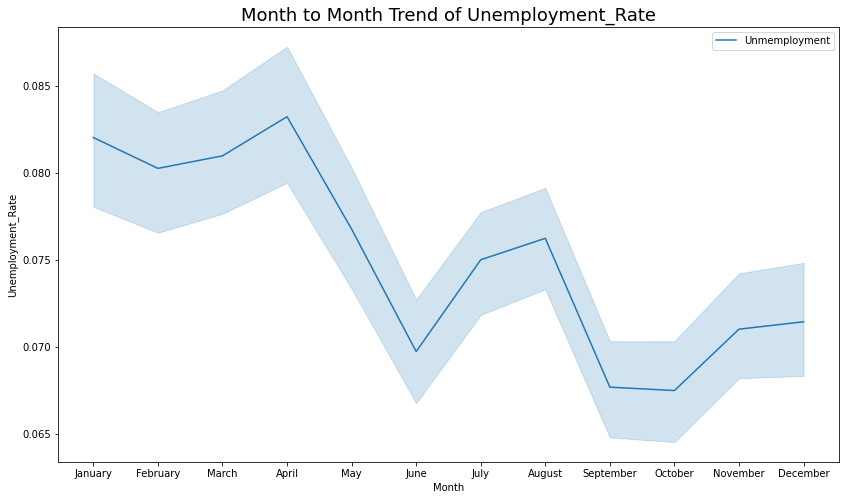

In [10]:
plt.figure(figsize=(14,8))
sns.lineplot(data=data, x='Month',y='Unemployment_Rate')
plt.title('Month to Month Trend of Unemployment_Rate', fontsize=18)
plt.ylabel('Unemployment_Rate')
plt.legend(labels=['Unmemployment'])

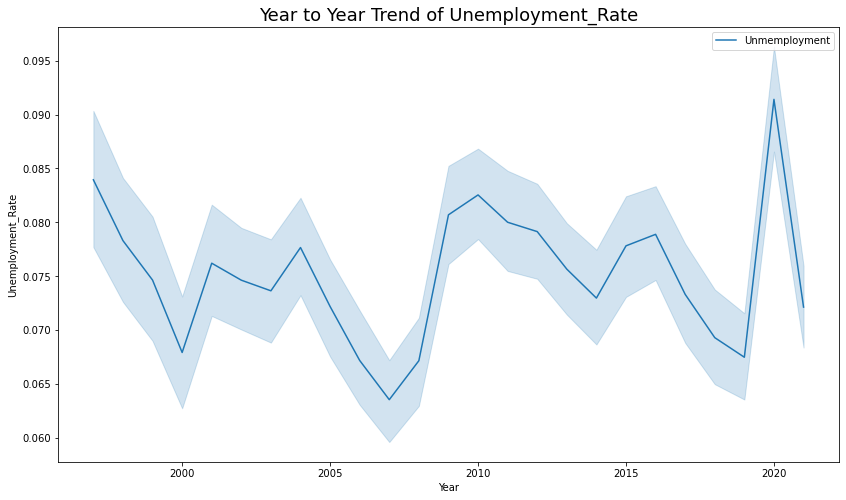

In [11]:
plt.figure(figsize=(14,8))
sns.lineplot(data=data, x='Year',y='Unemployment_Rate')
plt.title('Year to Year Trend of Unemployment_Rate', fontsize=18)
plt.ylabel('Unemployment_Rate')
plt.legend(labels=['Unmemployment'])

<AxesSubplot:title={'center':'Yearly Trend of Unemployment and EI Beneficiaries'}, xlabel='Year', ylabel='Unemployment'>

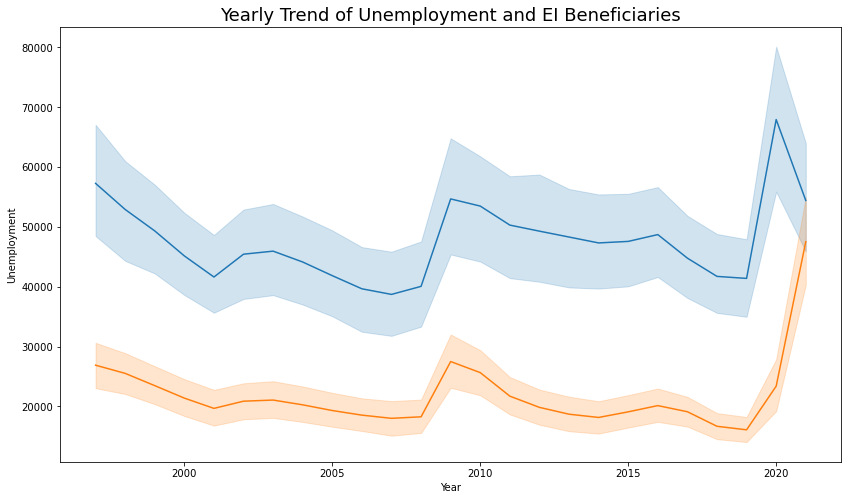

In [12]:
plt.figure(figsize=(14,8))
plt.title('Yearly Trend of Unemployment and EI Beneficiaries', fontsize=18)
sns.lineplot(data=data, x='Year',y='Unemployment')
sns.lineplot(data=data, x='Year',y='EI Beneficiaries')

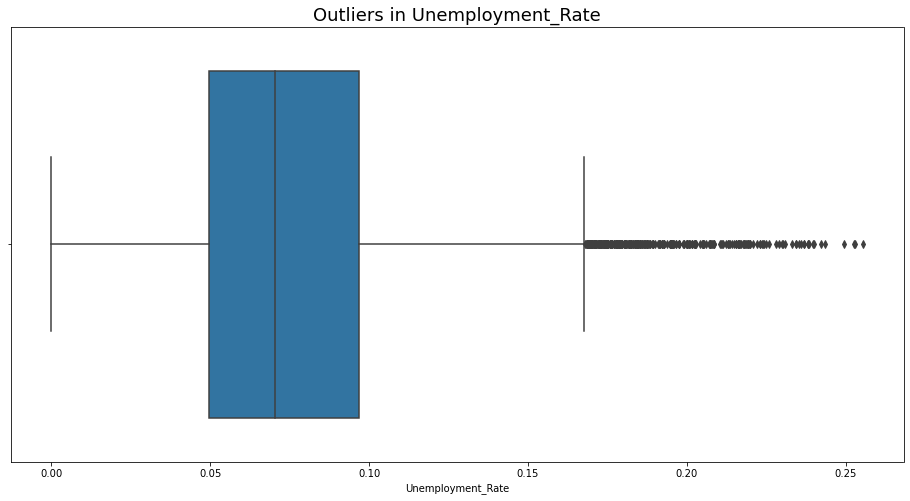

In [13]:
fig = plt.subplots(figsize=(16, 8))
plt.title('Outliers in Unemployment_Rate', fontsize=18)
ax = sns.boxplot(x=data['Unemployment_Rate'],whis=1.5)

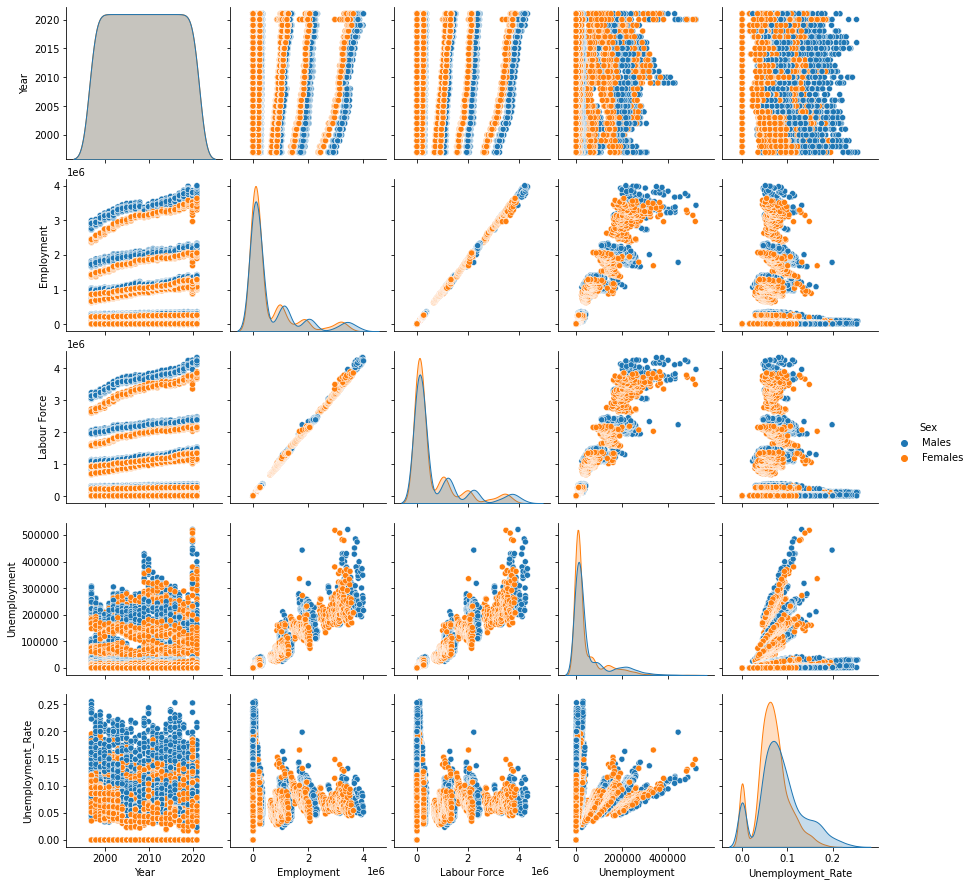

In [14]:
sns.pairplot(data[['Year','Sex','Employment','Labour Force','Unemployment', 'Unemployment_Rate']],hue='Sex')

<BarContainer object of 8400 artists>

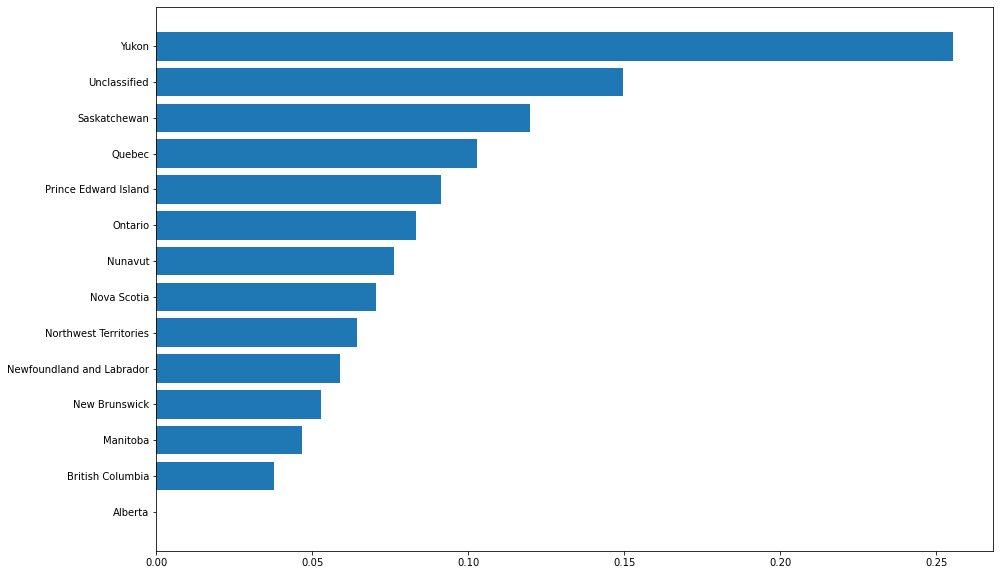

In [15]:
fig, ax = plt.subplots(figsize=(15, 10))
ax.barh(data['Province'], data['Unemployment_Rate'].sort_values())


### Data Preprocessing & Cleaning

In [16]:
data = pd.read_csv('Clean_Dataset.csv') # used clean aggregated data for modeling
data.head()

,Date,Month,Labour Force,Employment,Unemployment,Beneficiaries,Unemployment_Rate
0,1997-01-01,January,14677800,13162900,1514500,689660,0.103250
1,1997-02-01,February,14743400,13230600,1512600,678560,0.102208
2,1997-03-01,March,14780700,13304800,1476100,667350,0.102304
3,1997-04-01,April,14828500,13371100,1457700,662150,0.102792
4,1997-05-01,May,15185900,13748300,1437700,666020,0.095392


In [17]:
data['Date'] =  pd.to_datetime(data['Date'])
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Date               300 non-null    datetime64[ns]
 1   Month              300 non-null    object        
 2   Labour Force       300 non-null    int64         
 3   Employment         300 non-null    int64         
 4   Unemployment       300 non-null    int64         
 5   Beneficiaries      300 non-null    int64         
 6   Unemployment_Rate  300 non-null    float64       
dtypes: datetime64[ns](1), float64(1), int64(4), object(1)
memory usage: 16.5+ KB


In [18]:
data.isnull().sum()

Date                 0
Month                0
Labour Force         0
Employment           0
Unemployment         0
Beneficiaries        0
Unemployment_Rate    0
dtype: int64

In [19]:
data.dropna(inplace=True)


In [20]:
data.tail()

,Date,Month,Labour Force,Employment,Unemployment,Beneficiaries,Unemployment_Rate
295,2021-08-01,August,20890400,19238400,1652000,1477380,0.081865
296,2021-09-01,September,20578700,19273300,1305300,1296680,0.072504
297,2021-10-01,October,20520800,19283800,1237100,755140,0.071865
298,2021-11-01,November,20528300,19379000,1149300,691060,0.064992
299,2021-12-01,December,20463400,19367700,1095500,634610,0.065581


In [21]:
data.shape

(300, 7)

In [22]:
data= data[['Date','Unemployment_Rate']]
df1 = data.set_index('Date')
df1

,Unemployment_Rate
Date,
1997-01-01,0.103250
1997-02-01,0.102208
1997-03-01,0.102304
1997-04-01,0.102792
1997-05-01,0.095392
...,...
2021-08-01,0.081865
2021-09-01,0.072504
2021-10-01,0.071865


In [23]:
df1.shape

(300, 1)

### Splitting Data into Training and Test Set 

In [24]:
dataset = df1.filter(['Unemployment_Rate'])
dataset = df1.values

In [25]:
training_data_len = math.ceil(len(dataset)*0.8)
training_data_len

240

### Feature Scaling 

In [26]:
from sklearn.preprocessing import MinMaxScaler

In [27]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)
scaled_data

array([[0.60355449],
       [0.58878045],
       [0.59014337],
       [0.597067  ],
       [0.49217685],
       [0.35234149],
       [0.38139889],
       [0.33326064],
       [0.2489778 ],
       [0.24679714],
       [0.33309709],
       [0.29111922],
       [0.47325955],
       [0.44943575],
       [0.4424576 ],
       [0.50335277],
       [0.36297225],
       [0.26353376],
       [0.28397753],
       [0.27394646],
       [0.20013084],
       [0.19418852],
       [0.27100257],
       [0.30643843],
       [0.46688109],
       [0.42016027],
       [0.45592323],
       [0.48263643],
       [0.35959222],
       [0.18383035],
       [0.22210108],
       [0.19876792],
       [0.11481219],
       [0.12555198],
       [0.16791147],
       [0.15613585],
       [0.28741209],
       [0.26456958],
       [0.27607262],
       [0.26822221],
       [0.14119827],
       [0.06547457],
       [0.17647059],
       [0.16382271],
       [0.05626125],
       [0.07501498],
       [0.17892384],
       [0.170

In [28]:
train_data = scaled_data[0:training_data_len, :]
#Split the data into x_train and y_train datasets
x_train = [] #independent training features first empty column
y_train = [] #dependent training features second empty column
for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i,0])
    if i <= 60:
        print(x_train)
        print(y_train)
        print()


[array([0.60355449, 0.58878045, 0.59014337, 0.597067  , 0.49217685,
       0.35234149, 0.38139889, 0.33326064, 0.2489778 , 0.24679714,
       0.33309709, 0.29111922, 0.47325955, 0.44943575, 0.4424576 ,
       0.50335277, 0.36297225, 0.26353376, 0.28397753, 0.27394646,
       0.20013084, 0.19418852, 0.27100257, 0.30643843, 0.46688109,
       0.42016027, 0.45592323, 0.48263643, 0.35959222, 0.18383035,
       0.22210108, 0.19876792, 0.11481219, 0.12555198, 0.16791147,
       0.15613585, 0.28741209, 0.26456958, 0.27607262, 0.26822221,
       0.14119827, 0.06547457, 0.17647059, 0.16382271, 0.05626125,
       0.07501498, 0.17892384, 0.17063729, 0.51880371, 0.45265678,
       0.49252213, 0.57337494, 0.4144451 , 0.3177052 , 0.39979828,
       0.38521052, 0.24712879, 0.24453015, 0.33867142, 0.41970143])]
[0.5888486038270729]



In [29]:
x_train, y_train = np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(180, 60, 1)

### Building LSTM Model

In [30]:
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt

In [31]:
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences=False ))
model.add(Dense(25))
model.add(Dense(1))

In [32]:
#Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [33]:
#Train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

180/180 [==============================] - 9s 26ms/step - loss: 0.0138


In [34]:
#Create a new array containing new values 
test_data = scaled_data[training_data_len - 60:, :]
#Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])

In [35]:
# Convert x_test to numpy array
x_test = np.array(x_test)
#Reshape the data 
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [36]:
#Get the model labour force stat values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

In [37]:
#Get the root mean squared error(RMSE)
rmse = np.sqrt(np.mean(predictions - y_test)**2)
rmse

0.0006332236953845348

In [38]:
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
valid

<ipython-input-38-fb6554dbe6ad>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


,Date,Unemployment_Rate,Predictions
240,2017-01-01,0.087281,0.081961
241,2017-02-01,0.088335,0.081944
242,2017-03-01,0.089096,0.082114
243,2017-04-01,0.087296,0.082410
244,2017-05-01,0.078092,0.082697
245,2017-06-01,0.072131,0.082629
246,2017-07-01,0.077485,0.082168
247,2017-08-01,0.078777,0.081712
248,2017-09-01,0.071042,0.081318
249,2017-10-01,0.071119,0.080701


In [39]:
valid['Date'] =  pd.to_datetime(valid['Date'])


<ipython-input-39-a7d26d50d854>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Date'] =  pd.to_datetime(valid['Date'])


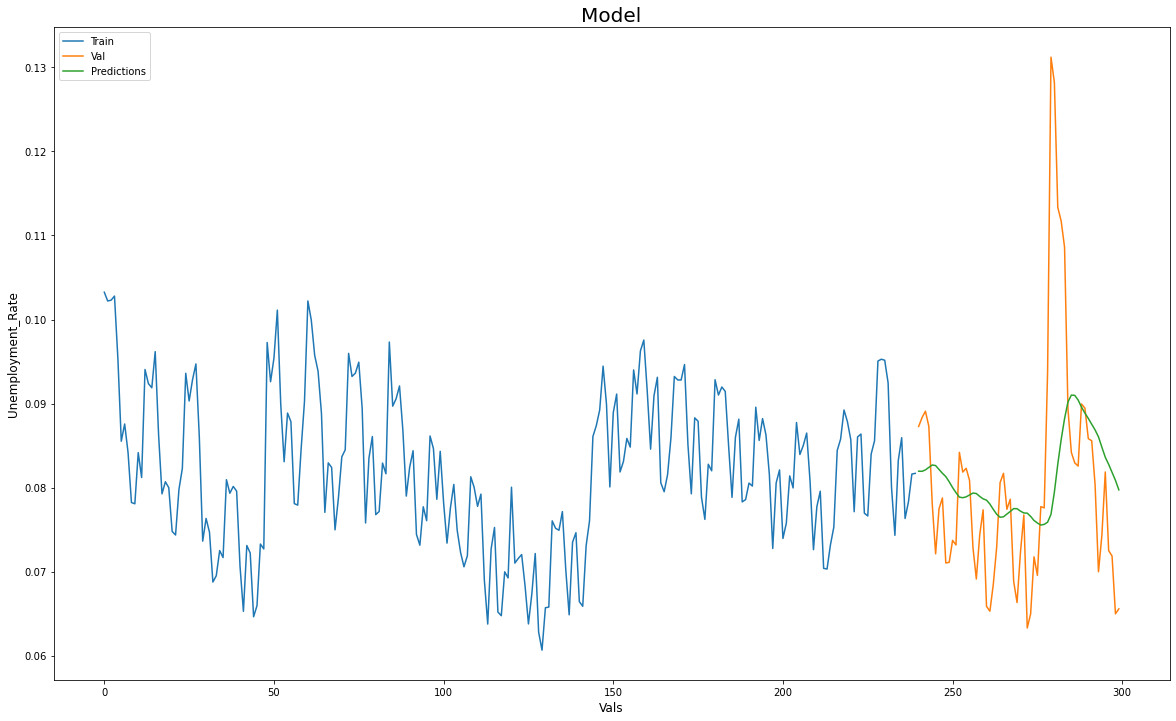

In [40]:
plt.figure(figsize=(20,12))
plt.title('Model',fontsize = 20)
plt.xlabel('Vals', fontsize = 12)
plt.ylabel('Unemployment_Rate', fontsize =12)
plt.plot(train['Unemployment_Rate'])
plt.plot(valid[['Unemployment_Rate', 'Predictions']])
plt.legend(['Train','Val', 'Predictions'], loc='upper left')
plt.show()

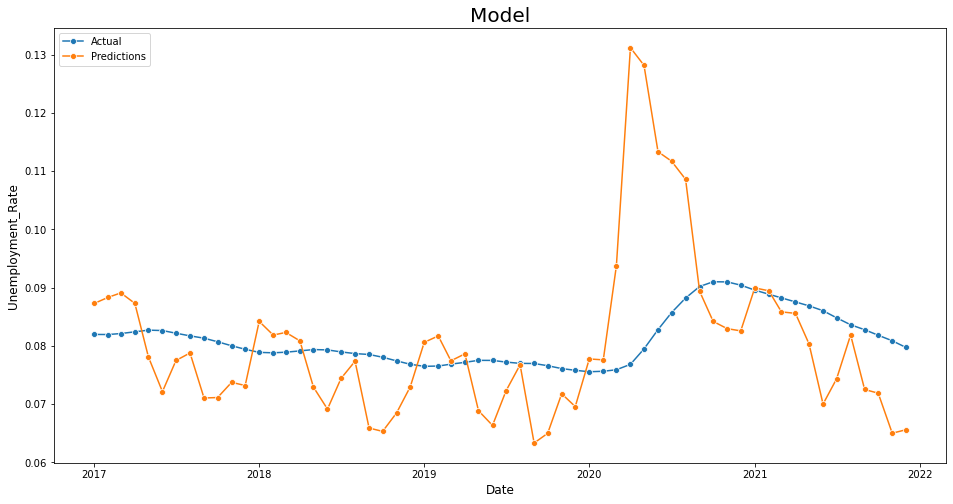

In [41]:
plt.figure(figsize=(16,8))
plt.title('Model',fontsize = 20)
plt.xlabel('Date', fontsize = 12)
plt.ylabel('Unemployment_Rate', fontsize =12)
ax1 = sns.lineplot(data= valid , x= 'Date', y ='Predictions',marker='o')
ax2 = sns.lineplot(data= valid , x= 'Date', y ='Unemployment_Rate', marker='o')
plt.legend(['Actual', 'Predictions'], loc='upper left')
plt.show()

### Predicting 2022

In [42]:
data = {'Date':  ['2022-01-01', '2022-02-02'],
        'Unemployment Rate': [0.065, 0.058],
        }
nextyear = pd.DataFrame(data)

print (nextyear)
year_2022 = nextyear.set_index('Date')
year_2022  = year_2022.filter(['Unemployment Rate'])
year_2022 = year_2022.values
year_2022  = np.array(year_2022)

         Date  Unemployment Rate
0  2022-01-01              0.065
1  2022-02-02              0.058


In [43]:
y_pred = model.predict(year_2022)
y_pred

array([[0.09223997],
       [0.09200607]], dtype=float32)

In [44]:
nextyear['Predictions'] = y_pred
nextyear

,Date,Unemployment Rate,Predictions
0,2022-01-01,0.065,0.092240
1,2022-02-02,0.058,0.092006
